# Randomness in sink

## imports

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import sqlite3

In [2]:
import cymetric as cym
from cymetric import graphs
from cymetric import timeseries

In [3]:
fig_params = {'axes.labelsize': 11.5,
              'font.family': 'serif',
              'font.size': 10,
              'legend.fontsize': 11,
              'xtick.labelsize': 10.5,
              'ytick.labelsize': 11,
              'figure.figsize': [9, 6],
              'figure.titlesize': 14.5,
              'savefig.format': 'png',
              'savefig.bbox': 'tight'}
plt.rcParams.update(fig_params)

palette = ['#507fb5', '#b5507f', '#7fb550', '#b58650']


## utils

In [4]:
def get_data(file):
    db = cym.dbopen(file)
    evaler = cym.Evaluator(db)
    
    name = os.path.splitext(file)[0]
    
    transactions = evaler.eval('TransactionQuantity')
    agents = evaler.eval('Agents')
    
    storage_id = agents.loc[agents["Prototype"] == "SomeSink"]["AgentId"]
    transaction_subset = transactions.loc[transactions["ReceiverId"] == storage_id.item()]
    
    data = {'ev': evaler,
            'agents': agents,
            'transactions': transactions,
            't_s': transaction_subset}
    
    return name, data

## input file names below

In [5]:
filenames = ['no-behavior.sqlite',
             'random-both.sqlite',
             'random-frequency.sqlite',
             'random-size.sqlite']


## grab all data

In [6]:
data = {}
for file in filenames:
    (name, file_data) = get_data(file)
    data[name] = file_data

# Plots
## transactions subplots

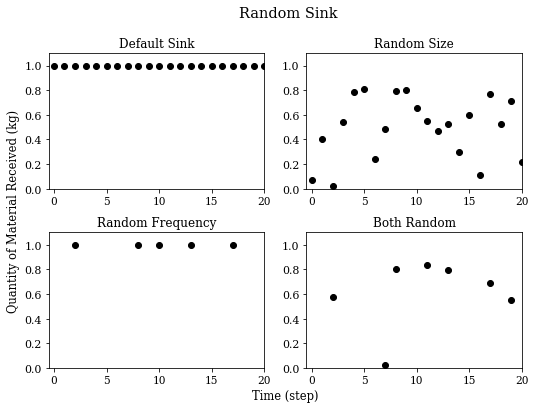

In [7]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Quantity of Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(221)
plt.xlim(-0.5,20)
plt.ylim(0,1.1)
ax0.set_xticks(np.arange(0, 21, 5))
ax0.set_yticks(np.arange(0, 1.11, 0.2))

ax0.scatter(data['no-behavior']['t_s']['Time'],
            data['no-behavior']['t_s']['Quantity'],
            color= 'k')
ax0.set_title('Default Sink')

ax1 = fig.add_subplot(222, sharex=ax0, sharey=ax0)

ax1.scatter(data['random-size']['t_s']['Time'],
            data['random-size']['t_s']['Quantity'],
            color= 'k')
ax1.set_title('Random Size')

ax2 = fig.add_subplot(223, sharex=ax0, sharey=ax0)
ax2.scatter(data['random-frequency']['t_s']['Time'],
            data['random-frequency']['t_s']['Quantity'],
            color= 'k')
ax2.set_title('Random Frequency')

ax3 = fig.add_subplot(224, sharex=ax0, sharey=ax0)
ax3.scatter(data['random-both']['t_s']['Time'],
            data['random-both']['t_s']['Quantity'],
            color= 'k')
ax3.set_title('Both Random')

fig.suptitle('Random Sink', x=0.55)
fig.tight_layout()

plt.savefig('transactions-subplots', transparent=True)


## Cumulative received subplots

In [8]:
data['no-behavior']['t_s']['CumQuant'] = data['no-behavior']['t_s']['Quantity'].cumsum()
data['random-size']['t_s']['CumQuant'] = data['random-size']['t_s']['Quantity'].cumsum()
data['random-frequency']['t_s']['CumQuant'] = data['random-frequency']['t_s']['Quantity'].cumsum()
data['random-both']['t_s']['CumQuant'] = data['random-both']['t_s']['Quantity'].cumsum()


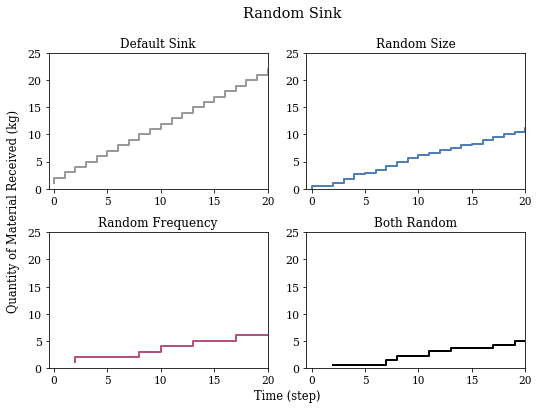

In [9]:
fig = plt.figure(figsize = (8, 6))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Quantity of Material Received (kg)')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top= False, bottom= False, left= False, right= False)

ax0 = fig.add_subplot(221)
plt.xlim(-0.5,20)
plt.ylim(0,25)
ax0.set_xticks(np.arange(0, 21, 5))
ax0.set_yticks(np.arange(0, 26, 5))

ax0.step(data['no-behavior']['t_s']['Time'],
         data['no-behavior']['t_s']['CumQuant'],
         linewidth= 2, 
         color= '0.6')
ax0.set_title('Default Sink')

ax1 = fig.add_subplot(222, sharex=ax0, sharey=ax0)

ax1.step(data['random-size']['t_s']['Time'],
         data['random-size']['t_s']['CumQuant'],
         linewidth= 2,
         color= palette[0])
ax1.set_title('Random Size')

ax2 = fig.add_subplot(223, sharex=ax0, sharey=ax0)
ax2.step(data['random-frequency']['t_s']['Time'],
         data['random-frequency']['t_s']['CumQuant'],
         linewidth= 2, 
         color= palette[1],)
ax2.set_title('Random Frequency')

ax3 = fig.add_subplot(224, sharex=ax0, sharey=ax0)
ax3.step(data['random-both']['t_s']['Time'],
         data['random-both']['t_s']['CumQuant'],
         linewidth= 2, 
         color= 'k')
ax3.set_title('Both Random')

fig.suptitle('Random Sink', x=0.55)
fig.tight_layout()

plt.savefig('cumulative-subplots', transparent=True)


## Cumulative single plot

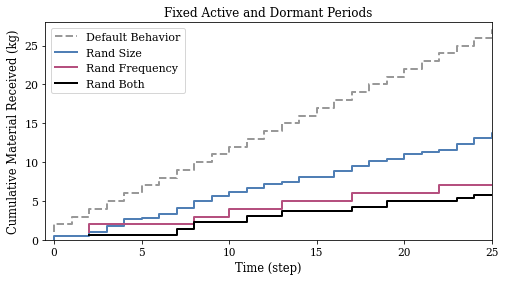

In [10]:
fig = plt.figure(figsize = (8, 4))

ax = fig.add_subplot(111)
ax.set_xlabel('Time (step)')
ax.set_ylabel('Cumulative Material Received (kg)')

plt.xlim(-0.5,25)
plt.ylim(0,28)
ax.set_xticks(np.arange(0, 26, 5))
ax.set_yticks(np.arange(0, 29, 5))


ax.step(data['no-behavior']['t_s']['Time'],
        data['no-behavior']['t_s']['CumQuant'],
        where='pre', linewidth= 2,
        color= '0.6',
        ls='dashed', label='Default Behavior')

ax.step(data['random-size']['t_s']['Time'],
        data['random-size']['t_s']['CumQuant'],
        where='pre', linewidth= 2,
        color= palette[0],
        label='Rand Size')

ax.step(data['random-frequency']['t_s']['Time'],
        data['random-frequency']['t_s']['CumQuant'],
        where='pre', linewidth= 2,
        color= palette[1],
        label='Rand Frequency')

ax.step(data['random-both']['t_s']['Time'],
        data['random-both']['t_s']['CumQuant'],
        where='pre', linewidth= 2,
        color= 'k', label='Rand Both')

ax.legend(loc = 'upper left')

plt.title('Random Sink')

plt.savefig('cumulative-oneplot', transparent=True)
